In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import loadtxt
from keras.models import load_model
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [3]:
df = pd.read_csv(r"C:/Users/prera/Desktop/FinalProject/data/heart_disease.csv")

In [4]:
df.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.shape

(303, 14)

In [6]:
df.columns

Index(['Age', 'Sex', 'Chest_Pain', 'Resting_Blood_Pressure', 'Colestrol',
       'Fasting_Blood_Sugar', 'Rest_ECG', 'MAX_Heart_Rate',
       'Exercised_Induced_Angina', 'ST_Depression', 'Slope', 'Major_Vessels',
       'Thalessemia', 'Target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       303 non-null    int64  
 1   Sex                       303 non-null    int64  
 2   Chest_Pain                303 non-null    int64  
 3   Resting_Blood_Pressure    303 non-null    int64  
 4   Colestrol                 303 non-null    int64  
 5   Fasting_Blood_Sugar       303 non-null    int64  
 6   Rest_ECG                  303 non-null    int64  
 7   MAX_Heart_Rate            303 non-null    int64  
 8   Exercised_Induced_Angina  303 non-null    int64  
 9   ST_Depression             303 non-null    float64
 10  Slope                     303 non-null    int64  
 11  Major_Vessels             303 non-null    object 
 12  Thalessemia               303 non-null    object 
 13  Target                    303 non-null    int64  
dtypes: float64

In [8]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

Age : 41 values
Sex : 2 values
Chest_Pain : 4 values
Resting_Blood_Pressure : 50 values
Colestrol : 152 values
Fasting_Blood_Sugar : 2 values
Rest_ECG : 3 values
MAX_Heart_Rate : 91 values
Exercised_Induced_Angina : 2 values
ST_Depression : 40 values
Slope : 3 values
Major_Vessels : 5 values
Thalessemia : 4 values
Target : 5 values


In [9]:
df.Thalessemia.value_counts()

3    166
7    117
6     18
?      2
Name: Thalessemia, dtype: int64

In [10]:
df.Target.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Target, dtype: int64

In [11]:
df['Target']=df['Target'].map({0:0,1:1,2:1,3:1,4:1})

In [12]:
df.Target.value_counts()

0    164
1    139
Name: Target, dtype: int64

In [13]:
df = df[~(df == '?').any(axis=1)]

In [14]:
df['Thalessemia']=pd.to_numeric(df['Thalessemia'])
df['Major_Vessels']=pd.to_numeric(df['Major_Vessels'])

In [15]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [16]:
print(len(numerical_features),'Numerical features: \n', numerical_features)
print('\n\n',len(categorical_features),'Categorical features:\n ', categorical_features)

5 Numerical features: 
 ['Age', 'Resting_Blood_Pressure', 'Colestrol', 'MAX_Heart_Rate', 'ST_Depression']


 9 Categorical features:
  ['Sex', 'Chest_Pain', 'Fasting_Blood_Sugar', 'Rest_ECG', 'Exercised_Induced_Angina', 'Slope', 'Major_Vessels', 'Thalessemia', 'Target']


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
Sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
Chest_Pain,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
Resting_Blood_Pressure,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
Colestrol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
Fasting_Blood_Sugar,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
Rest_ECG,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
MAX_Heart_Rate,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
Exercised_Induced_Angina,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
ST_Depression,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [18]:
df.isna().sum()

Age                         0
Sex                         0
Chest_Pain                  0
Resting_Blood_Pressure      0
Colestrol                   0
Fasting_Blood_Sugar         0
Rest_ECG                    0
MAX_Heart_Rate              0
Exercised_Induced_Angina    0
ST_Depression               0
Slope                       0
Major_Vessels               0
Thalessemia                 0
Target                      0
dtype: int64

# EDA

In [19]:
df.Target.value_counts()

0    160
1    137
Name: Target, dtype: int64

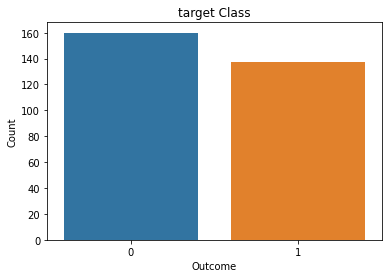

Percent of Heart Disease outcome:  46.13 %
Percent of not a Heart Disease outcome:  53.87 %


In [20]:
sns.countplot(x='Target',data=df)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of Heart Disease outcome: ',round(len(df[df['Target']== 1])/len(df['Target'])*100,2),"%")
print('Percent of not a Heart Disease outcome: ',round(len(df[df['Target']== 0])/len(df['Target'])*100,2),"%")

# Imputing numerical columns using MICE

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

https://medium.com/@WalePhenomenon/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

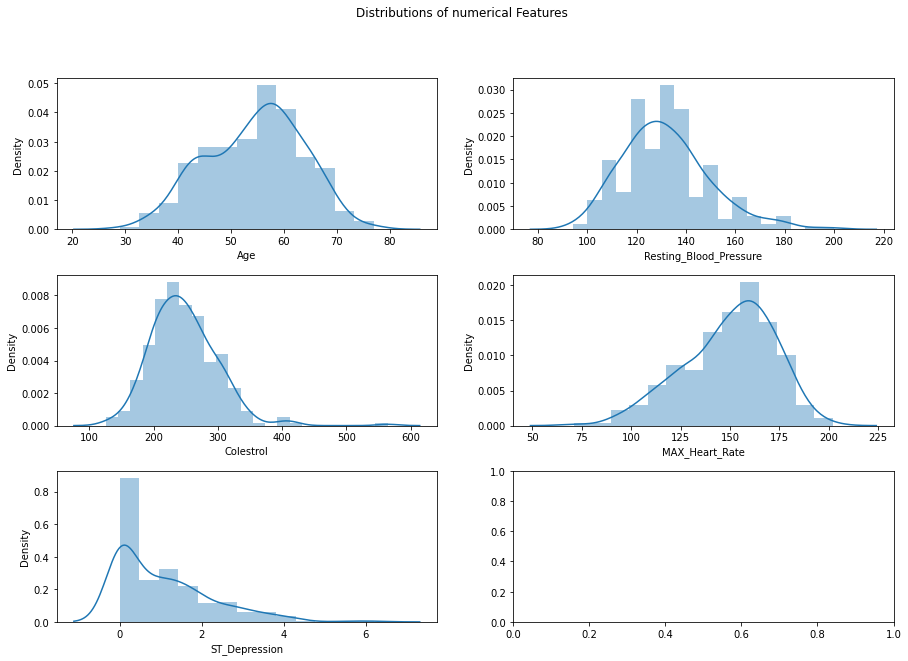

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Distributions of numerical Features')

for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[feats], ax=ax)

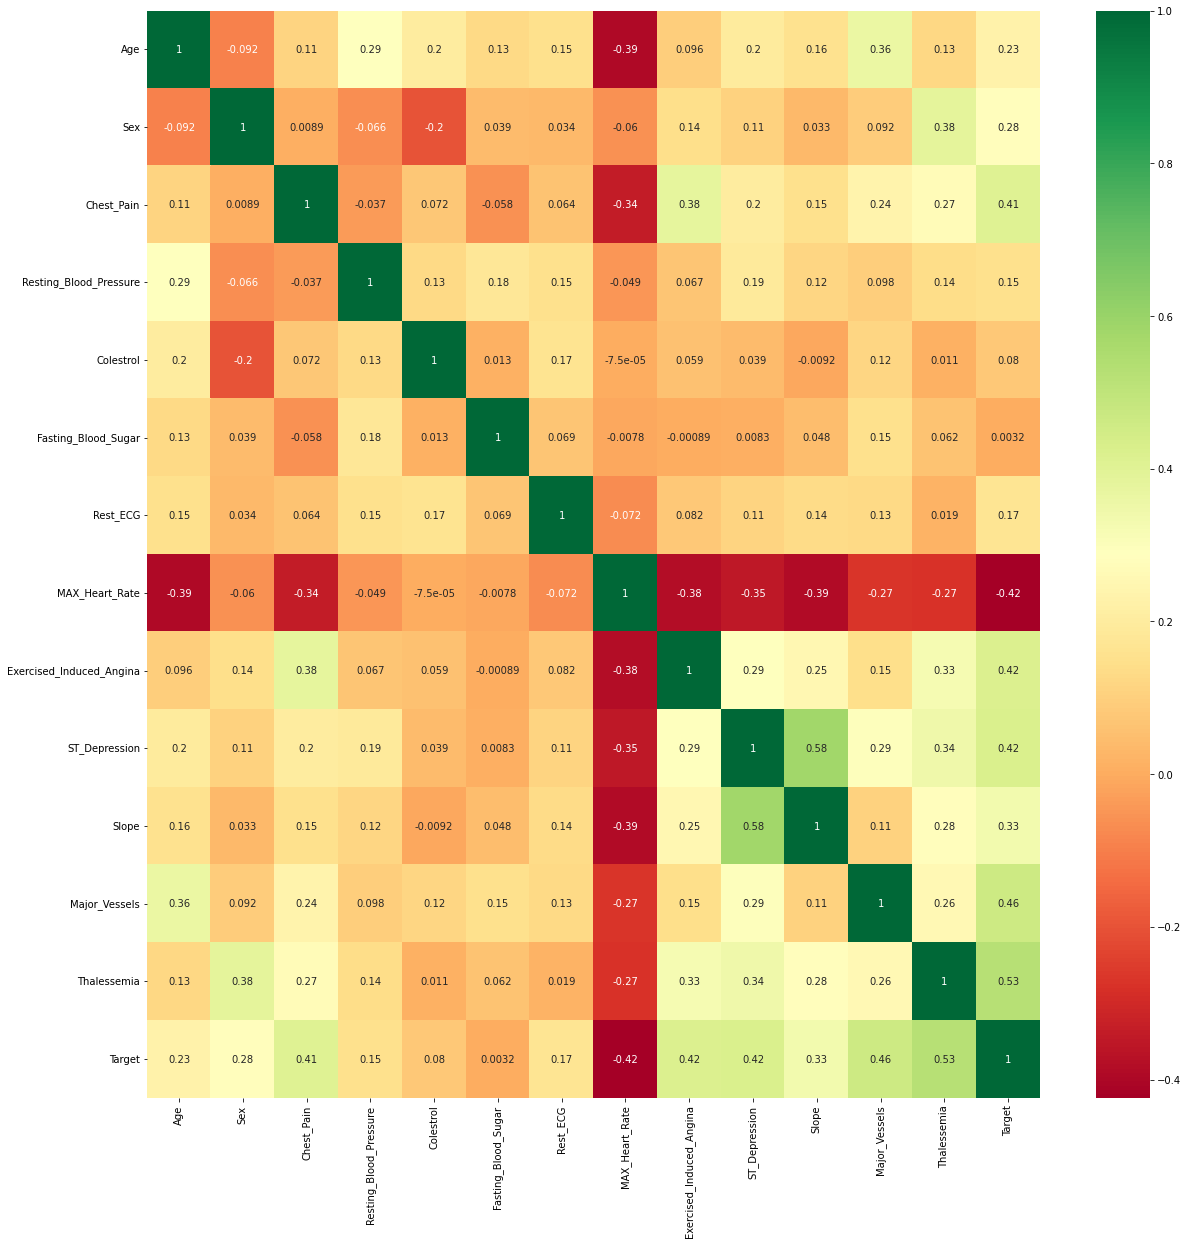

In [22]:
corr = df.corr()
plt.figure(figsize=(20,20))
g = sns.heatmap(corr, annot=True, cmap = "RdYlGn")

In [23]:
df.corr()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
Age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
Sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
Chest_Pain,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
Resting_Blood_Pressure,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
Colestrol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
Fasting_Blood_Sugar,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
Rest_ECG,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
MAX_Heart_Rate,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
Exercised_Induced_Angina,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
ST_Depression,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       297 non-null    int64  
 1   Sex                       297 non-null    int64  
 2   Chest_Pain                297 non-null    int64  
 3   Resting_Blood_Pressure    297 non-null    int64  
 4   Colestrol                 297 non-null    int64  
 5   Fasting_Blood_Sugar       297 non-null    int64  
 6   Rest_ECG                  297 non-null    int64  
 7   MAX_Heart_Rate            297 non-null    int64  
 8   Exercised_Induced_Angina  297 non-null    int64  
 9   ST_Depression             297 non-null    float64
 10  Slope                     297 non-null    int64  
 11  Major_Vessels             297 non-null    int64  
 12  Thalessemia               297 non-null    int64  
 13  Target                    297 non-null    int64  
dtypes: float64

In [25]:
df.isna().sum()

Age                         0
Sex                         0
Chest_Pain                  0
Resting_Blood_Pressure      0
Colestrol                   0
Fasting_Blood_Sugar         0
Rest_ECG                    0
MAX_Heart_Rate              0
Exercised_Induced_Angina    0
ST_Depression               0
Slope                       0
Major_Vessels               0
Thalessemia                 0
Target                      0
dtype: int64

In [26]:
# Splitting into X and y

#X, y = np.split(df,[-1],axis=1)

x = df.drop('Target', axis=1)
y = df.Target

y.value_counts()

0    160
1    137
Name: Target, dtype: int64

In [27]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
x

array([[0.70833333, 1.        , 0.        , ..., 1.        , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 0.66666667,
        1.        ],
       ...,
       [0.8125    , 1.        , 1.        , ..., 0.5       , 0.66666667,
        1.        ],
       [0.58333333, 1.        , 1.        , ..., 0.5       , 0.33333333,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.33333333,
        0.        ]])

In [28]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: Target, Length: 297, dtype: int64

In [29]:
print(Counter(y))

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

Counter(y)

Counter({0: 160, 1: 137})


Counter({0: 160, 1: 160})

In [30]:
# Train-Test Split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_test_1=x_test[1,]

x_test_1=x_test_1.reshape(1,-1)

x_test_1

(304, 13)
(16, 13)
(304,)
(16,)


array([[0.60416667, 0.        , 0.33333333, 0.39622642, 0.44063927,
        1.        , 1.        , 0.61832061, 0.        , 0.        ,
        0.        , 0.66666667, 0.        ]])

# Logistic Regression


In [31]:
heartlr=LogisticRegression(multi_class='multinomial')
heartlr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [32]:
# Accuracy
y_pred = heartlr.predict(x_test)
print('Accuracy of logistic regression classifier on test set:',heartlr.score(x_test, y_test))

Accuracy of logistic regression classifier on test set: 0.875


[[5 1]
 [1 9]]


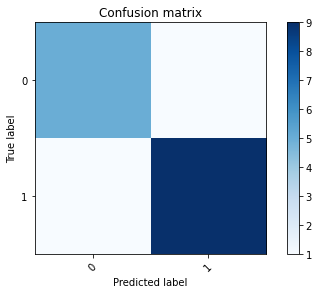

In [34]:
# Print and plot confusion matrix   
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [35]:
# Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.90      0.90      0.90        10

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16



# Naive Bayes


In [41]:
from sklearn.naive_bayes import BernoulliNB
heartNB = BernoulliNB()
y_pred = heartNB.fit(x_train, y_train)
y_pred = heartNB.predict(x_test)

In [42]:
#Acuracy
print("Bernoulli Naive Bayes model accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Bernoulli Naive Bayes model accuracy on test set: 0.75


[[5 1]
 [3 7]]


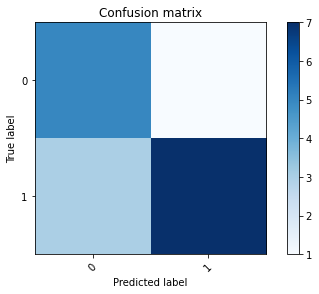

In [43]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])


In [44]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.88      0.70      0.78        10

    accuracy                           0.75        16
   macro avg       0.75      0.77      0.75        16
weighted avg       0.78      0.75      0.75        16



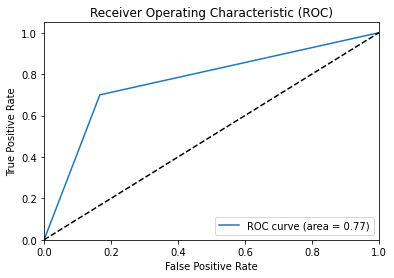

In [45]:
plot_roc(y_pred,y_test)


# Random Forest


In [46]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
heartrf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
heartrf.fit(x_train,y_train)

y_pred=heartrf.predict(x_test)


In [47]:
#Accuracy
print("Accuracy of Random forest on test set:",metrics.accuracy_score(y_test, y_pred))


Accuracy of Random forest on test set: 0.875


[[5 1]
 [1 9]]


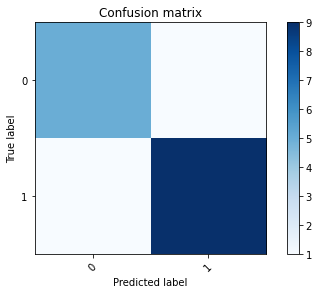

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])


In [49]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.90      0.90      0.90        10

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16



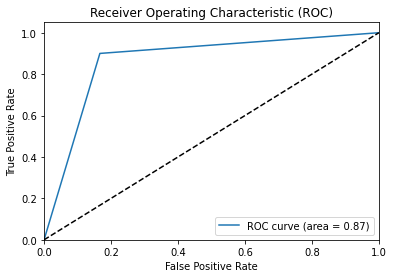

In [50]:
plot_roc(y_pred,y_test)


# XG-Boost


In [51]:
from numpy import loadtxt
from xgboost import XGBClassifier
heartxgb=XGBClassifier()
heartxgb.fit(x_train,y_train)


[18:21:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
y_pred = heartxgb.predict(x_test)
predictions = [round(value) for value in y_pred]


In [53]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for XGBoost on test set:", accuracy)


Accuracy for XGBoost on test set: 0.8125


In [54]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.82      0.90      0.86        10

    accuracy                           0.81        16
   macro avg       0.81      0.78      0.79        16
weighted avg       0.81      0.81      0.81        16



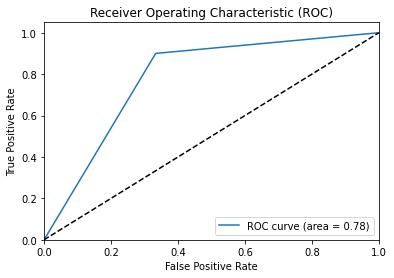

In [55]:
plot_roc(y_pred,y_test)

# Neural Network

In [56]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(heartlr, x, y, cv=5, scoring='accuracy').mean())

0.8375


In [57]:
heartnnmodel = Sequential()
heartnnmodel.add(Dense(64, input_dim=x_train.shape[1], activation='tanh'))
heartnnmodel.add(Dense(32, activation='tanh'))
heartnnmodel.add(Dense(1, activation='sigmoid'))

heartnnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

#chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

heartnnmodel.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, callbacks=[monitor], validation_split=0.25)

Epoch 1/200
12/12 - 0s - loss: 0.6540 - accuracy: 0.6053 - val_loss: 0.6268 - val_accuracy: 0.7237
Epoch 2/200
12/12 - 0s - loss: 0.5845 - accuracy: 0.7807 - val_loss: 0.5618 - val_accuracy: 0.8026
Epoch 3/200
12/12 - 0s - loss: 0.5296 - accuracy: 0.8026 - val_loss: 0.5070 - val_accuracy: 0.7895
Epoch 4/200
12/12 - 0s - loss: 0.4857 - accuracy: 0.8202 - val_loss: 0.4624 - val_accuracy: 0.8026
Epoch 5/200
12/12 - 0s - loss: 0.4495 - accuracy: 0.8246 - val_loss: 0.4286 - val_accuracy: 0.8026
Epoch 6/200
12/12 - 0s - loss: 0.4228 - accuracy: 0.8289 - val_loss: 0.4098 - val_accuracy: 0.8289
Epoch 7/200
12/12 - 0s - loss: 0.4022 - accuracy: 0.8377 - val_loss: 0.3961 - val_accuracy: 0.8421
Epoch 8/200
12/12 - 0s - loss: 0.3908 - accuracy: 0.8465 - val_loss: 0.3896 - val_accuracy: 0.8421
Epoch 9/200
12/12 - 0s - loss: 0.3898 - accuracy: 0.8202 - val_loss: 0.3918 - val_accuracy: 0.8289
Epoch 10/200
12/12 - 0s - loss: 0.3728 - accuracy: 0.8553 - val_loss: 0.3926 - val_accuracy: 0.8289
Epoch 11/

In [58]:
heartnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [61]:
y_pred = heartnnmodel.predict(x_test)
y_pred
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]


[1, 0, 0, 1, 0, 0, 1, 1, 0, 1]

In [62]:
accuracy = accuracy_score(y_test,argmax)
print("Accuracy for neural network on test set:", accuracy)

Accuracy for neural network on test set: 0.875


[[5 1]
 [1 9]]


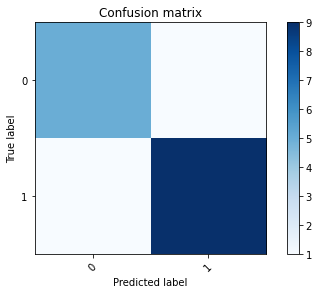

In [63]:
cm = confusion_matrix(y_test, argmax)
print(cm)
plot_confusion_matrix(cm,['0','1'])

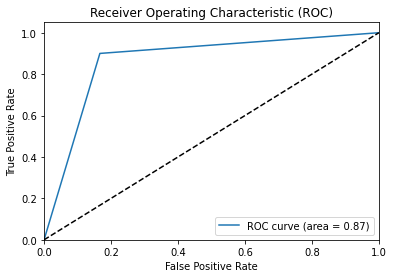

In [64]:
plot_roc(argmax,y_test)

# SAVING MODEL

In [65]:
import pickle
pickle.dump(heartrf,open("C:/Users/prera/Desktop/FINALPROJECT/models/heart_model.pkl","wb"))

In [69]:
# x_test_1=x_test[1,]

# x_test_1=x_test_1.reshape(1,-1)

# x_test_1
import pickle
model=pickle.load(open("C:/Users/prera/Desktop/FINALPROJECT/models/heart_model.pkl","rb"))
result = model.predict_proba(x_test_1)
print(result[0])

[0.68 0.32]
